In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import KFold

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\ACADEMIC\SEM 5\ML\course project work\ML_FinalSubmission_\Gender-and-Emotion-Classification-using-Voice-\assets\scaled_voice_data.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.602758,0.355976,1.055699,-0.142117,1.567427,1.027768,-0.210519,-0.540272,-0.835728,1.318746,-0.357016,0.582726,-1.266497,male
1,0.642158,0.219537,0.936464,1.053742,0.626879,-0.852602,-0.204561,0.214854,0.510834,0.914485,0.223601,-1.088261,0.743066,female
2,-0.495719,-0.169618,-0.309233,0.445927,-1.448345,-1.307654,-0.139015,-0.257852,0.191444,0.056141,0.986513,-1.022684,0.238451,female
3,-0.708439,0.021716,-0.541947,0.177739,-1.431259,-0.993061,-0.154961,0.057054,0.131876,-2.141210,0.675466,-0.643929,2.324912,female
4,1.763427,-1.871090,1.387941,1.710837,0.914199,-1.441506,-0.130894,-2.543075,-1.691409,0.917164,1.851877,0.805841,-0.133960,female


In [6]:
x = df.drop('gender',axis=1)
y = df['gender']
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx
0,0.602758,0.355976,1.055699,-0.142117,1.567427,1.027768,-0.210519,-0.540272,-0.835728,1.318746,-0.357016,0.582726,-1.266497
1,0.642158,0.219537,0.936464,1.053742,0.626879,-0.852602,-0.204561,0.214854,0.510834,0.914485,0.223601,-1.088261,0.743066
2,-0.495719,-0.169618,-0.309233,0.445927,-1.448345,-1.307654,-0.139015,-0.257852,0.191444,0.056141,0.986513,-1.022684,0.238451
3,-0.708439,0.021716,-0.541947,0.177739,-1.431259,-0.993061,-0.154961,0.057054,0.131876,-2.141210,0.675466,-0.643929,2.324912
4,1.763427,-1.871090,1.387941,1.710837,0.914199,-1.441506,-0.130894,-2.543075,-1.691409,0.917164,1.851877,0.805841,-0.133960


In [7]:
y.head()

0      male
1    female
2    female
3    female
4    female
Name: gender, dtype: object

### K-cross Validation for k=10

In [8]:
def logistic_regression_modelling(x_train, y_train, x_test, y_test, i, k, display_stats=False):

    lr_model = LogisticRegression(penalty='l2', max_iter=500)
    lr_model.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)

    # Accuracy, Precision, Recall, F1-score of Model
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    precision = metrics.precision_score(y_test, y_pred, average='weighted')

    if display_stats:
        print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1_score}")
        print()

    return np.array([accuracy, precision, recall, f1_score])

#### Performing the kcross validation 

In [9]:
k = 10  # value of k chosen
i = 0
k_fold = KFold(n_splits=k)

mean_stats = np.zeros(4)

for train_i, test_i in k_fold.split(x):
    x_train, x_test = x.loc[train_i], x.loc[test_i]
    y_train, y_test = y.loc[train_i], y.loc[test_i]
    
    stats = logistic_regression_modelling(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
    mean_stats = mean_stats + stats
    
# Calculating the mean of accuracy, precision , recall, f1_score
mean_stats = mean_stats / k

print(f"Mean accuracy: {mean_stats[0]*100}")
print(f"Mean Precision: {mean_stats[1]*100}")
print(f"Mean Recall: {mean_stats[2]*100}")
print(f"MeanF1-score: {mean_stats[3]*100}")

Mean accuracy: 97.15918619973645
Mean Precision: 97.16687553306818
Mean Recall: 97.15918619973645
MeanF1-score: 97.15914363390738


### ROC-AUC Curve for Logistic Regression 

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn import metrics

le = LabelEncoder()
Y_encoded = le.fit_transform(y)

xtrain_roc, xtest_roc, ytrain_roc, ytest_roc = train_test_split(x, Y_encoded, test_size=0.2)

In [15]:
def roc_auc(y_test, y_pred):
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
    lisrt=['male','female']
    for m in range(2):
        ls=[]
        for j in y_test:
            if m==j:
                ls.append(1)
            else:
                ls.append(0)

        fpr, tpr, thresh =  metrics.roc_curve(ls,y_pred[:,m])
        auc = metrics.roc_auc_score(ls,y_pred[:,m])
        axes[m].plot(fpr, tpr,  label="AUC = " +str(auc), linestyle='--',color='red')
        axes[m].set_title(f'ROC-AUC curve for class {lisrt[m]}')
        axes[m].set_xlabel('False Positive Rate')
        axes[m].set_ylabel('True Positive rate')
        axes[m].legend(lisrt[m])
        axes[m].text(0.5,0.0, f'AUC value :{auc}')
        plt.savefig(r'C:\ACADEMIC\SEM 5\ML\course project work\ML_FinalSubmission_\Gender-and-Emotion-Classification-using-Voice-\images/ROC-AUC_curve_for_LR',dpi=300)
        plt.tight_layout()

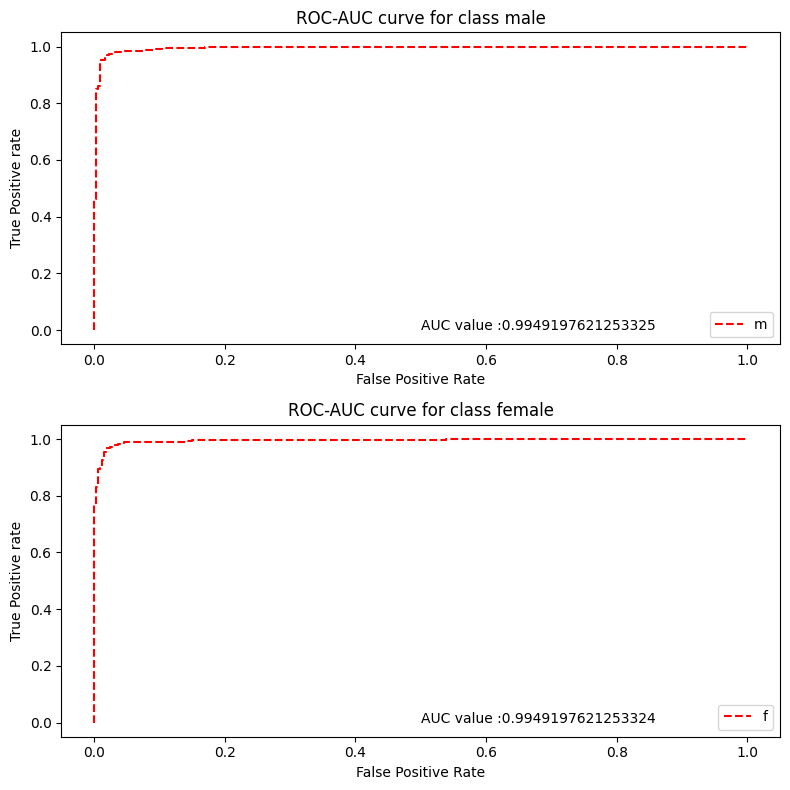

In [16]:
log_reg_model = LogisticRegression(penalty='l2', max_iter=500)
log_reg_model.fit(xtrain_roc, ytrain_roc)
ypred_roc = log_reg_model.predict_proba(xtest_roc)

roc_auc(ytest_roc, ypred_roc)